📁 Upload the IMDB India Movies CSV file:


Saving IMDb Movies India.csv to IMDb Movies India (5).csv

✅ Dataset Loaded Successfully!

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3 

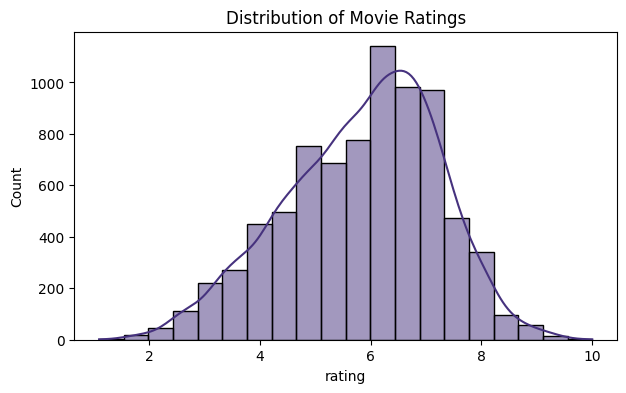

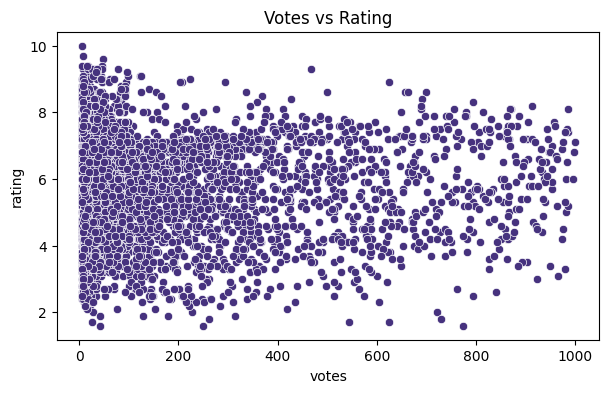


🎬 Model Training Completed!

📊 MODEL PERFORMANCE
MAE  : 0.943
RMSE : 1.241
R² Score : 0.172

⭐ SAMPLE MOVIE PREDICTION ⭐
Predicted Rating: ⭐ 7.01 / 10


In [7]:
# ============================== #
# MOVIE RATING PREDICTION
# ============================== #

# -----------------------------------------
# 1️⃣ IMPORT LIBRARIES
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# -----------------------------------------
# 2️⃣ UPLOAD DATASET (KAGGLE CSV)
# -----------------------------------------
print("📁 Upload the IMDB India Movies CSV file:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]

# Fix UnicodeDecodeError using latin1 encoding
try:
    df = pd.read_csv(filename, encoding="latin1")
except:
    df = pd.read_csv(filename, encoding="cp1252")

print("\n✅ Dataset Loaded Successfully!\n")
print(df.head())

# -----------------------------------------
# 3️⃣ CLEAN THE DATA
# -----------------------------------------

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Convert numeric columns
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")
df["votes"] = pd.to_numeric(df["votes"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop rows where rating is missing (target variable)
df = df.dropna(subset=["rating"])

print("\n👍 Data Cleaning Completed!")

# -----------------------------------------
# 4️⃣ EDA (Visual)
# -----------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x=df["votes"], y=df["rating"])
plt.title("Votes vs Rating")
plt.show()

# -----------------------------------------
# 5️⃣ FEATURE SELECTION
# -----------------------------------------
X = df[["genre", "director", "year", "duration", "votes", "actor 1"]]
y = df["rating"]

categorical_features = ["genre", "director", "actor 1"]
numeric_features = ["year", "duration", "votes"]

# -----------------------------------------
# 6️⃣ BUILD PREPROCESSING PIPELINE (FIX NAN ERROR HERE)
# -----------------------------------------

preprocess = ColumnTransformer(
    transformers=[
        # Impute + encode categorical
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features),

        # Impute numeric columns
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), numeric_features)
    ]
)

# Model
model = RandomForestRegressor(n_estimators=250, random_state=42)

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", model)
])

# -----------------------------------------
# 7️⃣ TRAIN/TEST SPLIT
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# 8️⃣ TRAIN MODEL
# -----------------------------------------
pipeline.fit(X_train, y_train)
print("\n🎬 Model Training Completed!")

# -----------------------------------------
# 9️⃣ MODEL EVALUATION
# -----------------------------------------
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 MODEL PERFORMANCE")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R² Score : {r2:.3f}")

# -----------------------------------------
# 🔟 SAMPLE PREDICTION
# -----------------------------------------
sample_movie = pd.DataFrame({
    "genre": ["Drama"],
    "director": ["Rajkumar Hirani"],
    "year": [2024],
    "duration": [160],
    "votes": [35000],
    "actor 1": ["Aamir Khan"]
})

prediction = pipeline.predict(sample_movie)[0]

print("\n⭐ SAMPLE MOVIE PREDICTION ⭐")
print(f"Predicted Rating: ⭐ {round(prediction,2)} / 10")
